## * 아래 2칸 실행

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [4]:
# 경로 변수 (고정)

dataLoc = '../_data/'
trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
testfile = 'test_clean.csv'
old_testfile = 'test.csv'
train_171016 = '171016_dow_hr_pas_L2_dur_only.csv'


## 원본 `train.csv` (전처리 이전)

In [16]:
# train_03_997.csv
taxi_df = pd.read_csv(dataLoc + trainfile)
taxi_df['p_dt'] = pd.to_datetime(taxi_df['p_dt'])
taxi_df.head()

,p_dt,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,1,-74.006615,40.740650,-73.985619,40.723362,1151


### 요일, hr, 탑승객 수, 직선거리, duration 변수만 남긴 `train.csv`

In [29]:
# 171016_dow_hr_pas_L2_dur_only.csv
main_df = pd.read_csv(dataLoc + train_171016)
main_df.head()

,dow,hr,pas,L2,dur
0,Sa,23,1,0.069424,1454
1,Sa,23,1,0.057791,1409
2,Sa,23,2,0.066698,1081
3,Sa,23,1,0.018223,800
4,Sa,23,1,0.027198,1151


### OLS: duration = 요일 + 시간 + 탑승객 + 거리 // (상수없음) 

In [9]:
model0 = sm.OLS.from_formula("dur ~ C(dow) + C(hr) + C(pas) + L2 - 1", data=main_df)

In [10]:
print(model0.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 2.975e+04
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:18:38   Log-Likelihood:            -4.9786e+06
No. Observations:              682598   AIC:                         9.957e+06
Df Residuals:                  682561   BIC:                         9.958e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(dow)[F]     516.4183    102.779      5.025      

### OLS: duration = 요일 + 시간 + 거리 // (상수있음) 

In [7]:
model1 = sm.OLS.from_formula("dur ~ C(dow) + C(hr) + L2", data=main_df)

In [8]:
print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 3.566e+04
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:17:43   Log-Likelihood:            -4.9789e+06
No. Observations:              682598   AIC:                         9.958e+06
Df Residuals:                  682567   BIC:                         9.958e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      335.2862      2.529    132.598   

### OLS: duration = 요일 + 시간 + 거리 // (상수없음) 

In [12]:
model2 = sm.OLS.from_formula("dur ~ C(dow) + C(hr) + L2 - 1", data=main_df)

In [13]:
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    dur   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 3.566e+04
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:19:12   Log-Likelihood:            -4.9789e+06
No. Observations:              682598   AIC:                         9.958e+06
Df Residuals:                  682567   BIC:                         9.958e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(dow)[F]     335.2862      2.529    132.598      

--------
## \*\* 분석용 간결한 df 만들기 \*\*
### 1. df 복사

In [17]:
copy_df = taxi_df.copy()  # 분석 필요한 df명 넣기
copy_df.head()

,p_dt,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,1,-74.006615,40.740650,-73.985619,40.723362,1151


### 2. `copy_df`에 두번째 열로 `hr`값 삽입

In [18]:
copy_df.insert(loc=1, column='hr', value=copy_df['p_dt'].dt.hour)

### 3. `copy_df`에 두번째 열로 요일값 삽입

In [19]:
dow_conv = {0 : 'M', 1 : 'T', 2 : 'W', 3 : 'R', 4 : 'F', 5 : 'Sa', 6 : 'Su'}

copy_df.insert(loc=1, column='dow', value=copy_df['p_dt'].dt.dayofweek)

In [20]:
copy_df = copy_df.replace({'dow' : dow_conv})

In [21]:
copy_df.head()

,p_dt,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,dur
0,2016-04-30 23:59:00,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,2016-04-30 23:59:00,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,2016-04-30 23:59:00,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,2016-04-30 23:58:00,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,800
4,2016-04-30 23:58:00,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,1151


### 4. `p_dt`열 삭제

In [22]:
# 한번만 실행 가능
del copy_df['p_dt']
copy_df.head()

,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,dur
0,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,1454
1,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,1409
2,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,1081
3,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,800
4,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,1151


### 5. 거리 (L2 norm) 변수 생성 및 삽입

In [23]:
def dist(plng, plat, dlng, dlat):
    return ((dlng-plng)**2 + (dlat-plat)**2) ** 0.5

In [24]:
copy_df.insert(loc=7, column='L2', value=np.vectorize(dist)(\
                copy_df['p_lng'], copy_df['p_lat'],\
                copy_df['d_lng'], copy_df['d_lat']))

copy_df.head()

,dow,hr,pas,p_lng,p_lat,d_lng,d_lat,L2,dur
0,Sa,23,1,-73.987793,40.724792,-73.975616,40.656445,0.069424,1454
1,Sa,23,1,-73.957596,40.717770,-73.951424,40.775230,0.057791,1409
2,Sa,23,2,-74.000954,40.742031,-73.947708,40.782200,0.066698,1081
3,Sa,23,1,-73.985733,40.738258,-73.993179,40.754890,0.018223,800
4,Sa,23,1,-74.006615,40.740650,-73.985619,40.723362,0.027198,1151


### 6. 경도/위도 열 삭제

In [25]:
# 4개 열 전부 삭제
todel = ['p_lng', 'p_lat', 'd_lng', 'd_lat']

for thing in todel:
    del copy_df[thing]

In [26]:
copy_df.head()

,dow,hr,pas,L2,dur
0,Sa,23,1,0.069424,1454
1,Sa,23,1,0.057791,1409
2,Sa,23,2,0.066698,1081
3,Sa,23,1,0.018223,800
4,Sa,23,1,0.027198,1151


### 7. 필요한 경로로 `csv`파일 저장 (끝)

In [33]:
copy2_df.to_csv("../_data/171016_dow_hr_pas_L2_dur_only.csv", index=False)

---
## * 각종 분석 시도

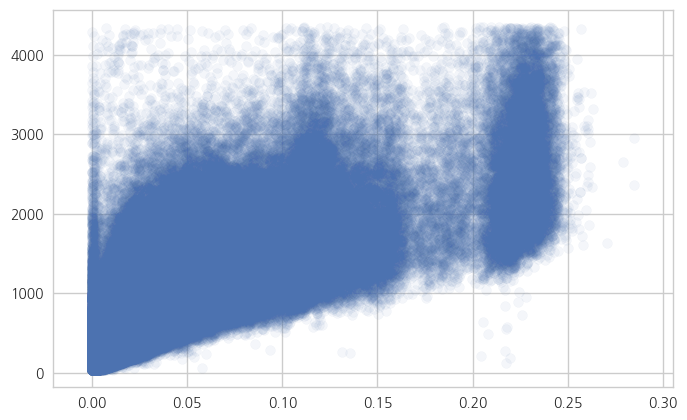

In [30]:
# L2 거리 vs 소요시간
plt.scatter(main_df['L2'], main_df['dur'], alpha=0.06)
plt.show()

In [31]:
main_df.describe()

,hr,pas,L2,dur
count,682598.000000,682598.000000,682598.000000,682598.000000
mean,13.653941,1.667216,0.032574,787.538633
std,6.367445,1.320444,0.036615,570.515853
min,0.000000,0.000000,0.000000,33.000000
25%,9.000000,1.000000,0.012452,389.000000
50%,14.000000,1.000000,0.020734,640.000000
75%,19.000000,2.000000,0.036569,1021.000000
max,23.000000,6.000000,0.285147,4349.000000


In [6]:
%matplotlib inline

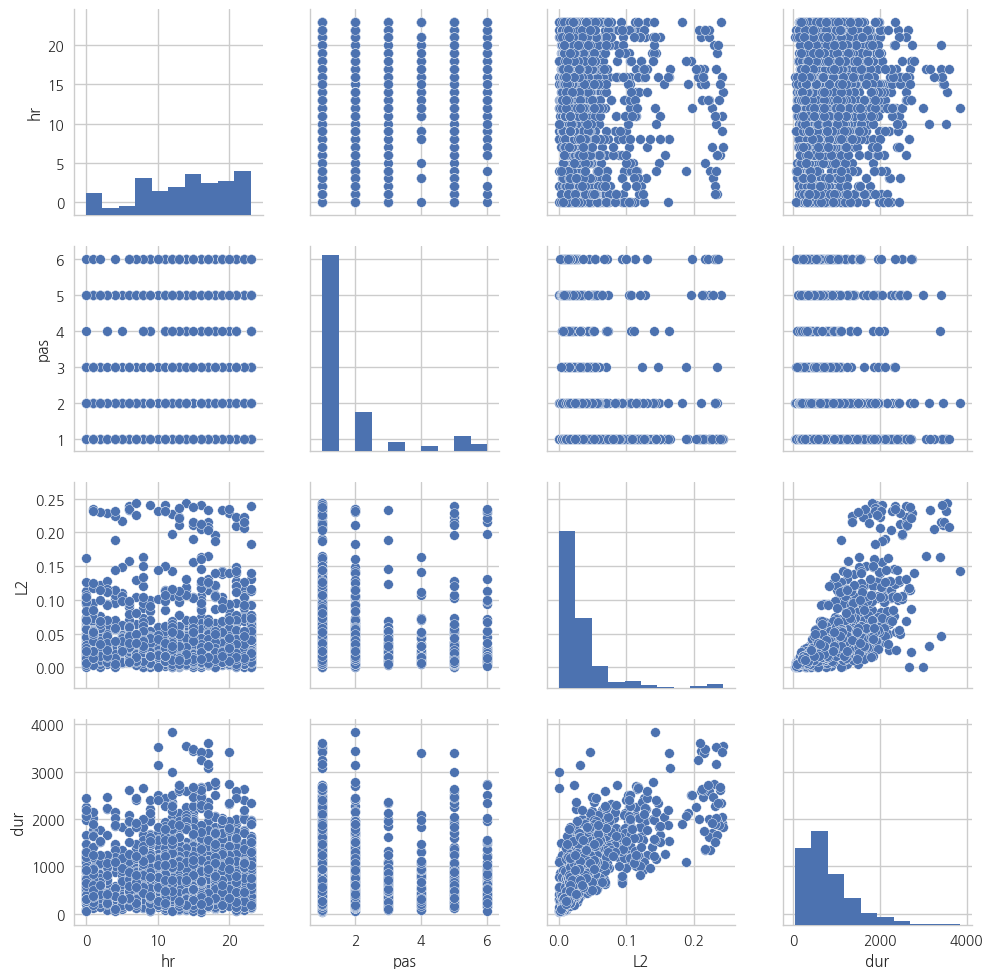

In [35]:
cols = ['hr', 'pas', 'L2', 'dur']
plt.figure(figsize=(6, 6))
sns.pairplot(main_df.iloc[::300, :])